# Clustering

## KMeans clustering

### import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaboarn as sns

### load the data set

In [3]:
df = pd.read_csv("/tmp/Mall_Customers.csv")
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


### Explorator Data Analysis (EDA)

In [4]:
# describe the statistical data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# describe the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Data Pre-Processing

In [6]:
# remove the features which are not needed
print(df.columns)
df.drop(["CustomerID", "Gender", "Age"], axis=1, inplace=True)
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [9]:
print(df.columns)

# rename the columns "Annual Income (k$)" to "income"
df.rename({"Annual Income (k$)": "income"}, inplace=True, axis=1)

# rename the columns "Spending Score (1-100)" to "score"
df.rename({"Spending Score (1-100)": "score"}, inplace=True, axis=1)

print(df.columns)

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Index(['income', 'score'], dtype='object')


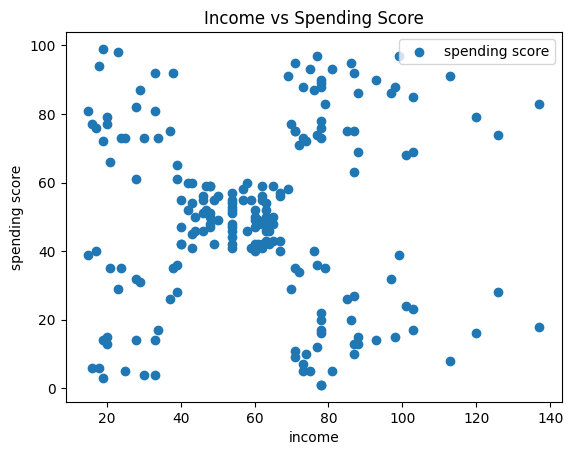

In [15]:
# plot the income vs score
plt.scatter(df['income'], df['score'], label="spending score")
plt.xlabel("income")
plt.ylabel("spending score")
plt.title("Income vs Spending Score")
plt.legend()

### create the clusters

In [16]:
# import the KMeans class for creating the clusters
from sklearn.cluster import KMeans

In [41]:
# create an object of KMeans
# n_clusters = no of clusters (k value)
# random_state = to stabilize the randomness
kmeans_model = KMeans(n_clusters=5, random_state=12345)

# fit the data into the object
# - this will divide the data into 5 clusters
kmeans_model.fit(df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=12345)

In [42]:
# inspect the clusters
kmeans_model.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [43]:
# inspect the centroids
kmeans_model.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

### result visualization

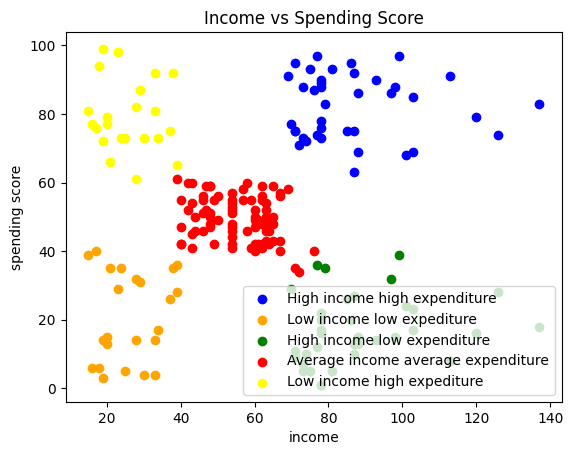

In [34]:
# add the rows which belong to cluster 0
plt.scatter(df['income'][kmeans_model.labels_ == 0], 
            df['score'][kmeans_model.labels_ == 0], 
            color="blue", label="High income high expenditure")

# add the rows which belong to cluster 1
plt.scatter(df['income'][kmeans_model.labels_ == 1], 
            df['score'][kmeans_model.labels_ == 1], 
            color="orange", label="Low income low expediture")

# add the rows which belong to cluster 2
plt.scatter(df['income'][kmeans_model.labels_ == 2], 
            df['score'][kmeans_model.labels_ == 2], 
            color="green", label="High income low expenditure")

# add the rows which belong to cluster 3
plt.scatter(df['income'][kmeans_model.labels_ == 3], 
            df['score'][kmeans_model.labels_ == 3], 
            color="red", label="Average income average expenditure")

# add the rows which belong to cluster 4
plt.scatter(df['income'][kmeans_model.labels_ == 4], 
            df['score'][kmeans_model.labels_ == 4], 
            color="yellow", label="Low income high expediture")

plt.title("Income vs Spending Score")
plt.xlabel("income")
plt.ylabel("spending score")
plt.legend()

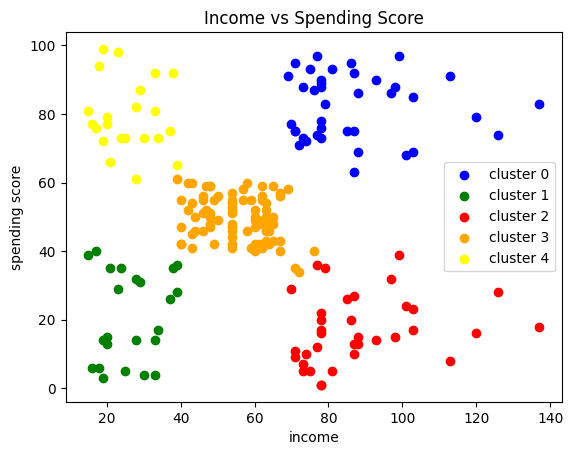

In [38]:
colors = ["blue", "green", "red", "orange", "yellow"]
for cluster in range(len(kmeans_model.cluster_centers_)):
    plt.scatter(df['income'][kmeans_model.labels_ == cluster], 
                df['score'][kmeans_model.labels_ == cluster],
                color=colors[cluster], label=f"cluster {cluster}")


plt.title("Income vs Spending Score")
plt.xlabel("income")
plt.ylabel("spending score")
plt.legend()